In [ ]:
from io import StringIO, BytesIO
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump, load

In [ ]:
# Upload the CSV file
uploaded_file = files.upload()

Saving HR_ana.csv to HR_ana.csv


In [ ]:
# Read the DataFrame
data = pd.read_csv(BytesIO(uploaded_file['HR_ana.csv']))

In [ ]:
# Display the DataFrame
print(data)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Missing value checks¶


In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data Processing


Converting Target variable to binary

In [ ]:
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})


In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(data.Department.unique())
print('\n')
print(data.EducationField.unique())
print('\n'
     )
print(data.Education.unique())

['Sales' 'Research & Development' 'Human Resources']


['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


[2 1 4 3 5]


In [ ]:
data.Education.replace({1: 'High School',
                       2:'Undergrad',
                       3:'Graduate',
                       4:'Post Graduate',
                       5:'Doctorate'},inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Undergrad,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Undergrad,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Post Graduate,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
cols = ["JobInvolvement", "JobSatisfaction", "PerformanceRating"]

for col in cols:
    data[col].replace({1 : "Low",
                                    2 : "Medium",
                                    3 : "High",
                                    4 : "Very High"}, inplace = True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Undergrad,Life Sciences,1,1,2,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,High,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,3,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Very High,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Undergrad,Other,1,4,4,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,High,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Post Graduate,Life Sciences,1,5,4,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,High,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,1,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,High,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data = data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
attFeatures = []
for i in data.columns:
    attFeatures.append([i, data[i].nunique(), data[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[1, 0]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[Undergrad, High School, Post Graduate, Gradua..."
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
9,Gender,2,"[Female, Male]"


DATA VISUALIZATION

Attrition Rate

0    1233
1     237
Name: Attrition, dtype: int64

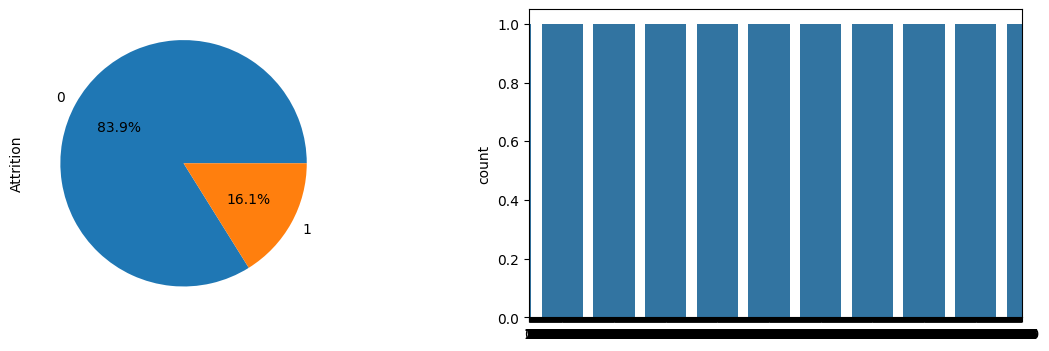

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Attrition'])
data['Attrition'].value_counts()

Travel Readiness

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

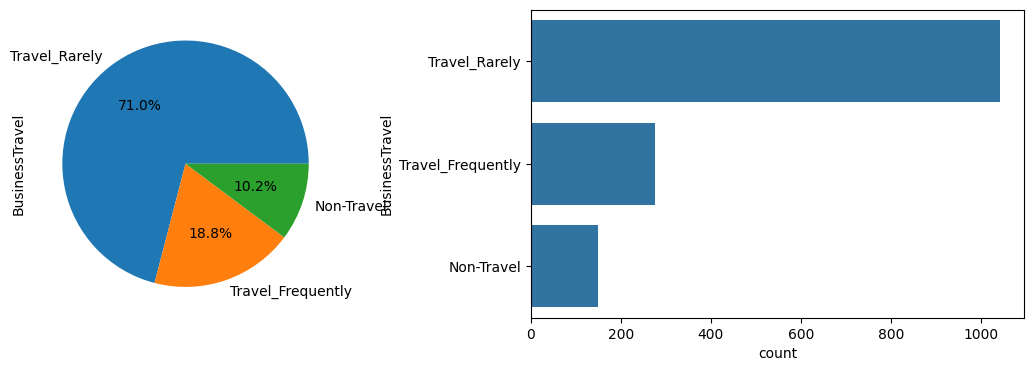

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['BusinessTravel'])
data['BusinessTravel'].value_counts()

Count by Department

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

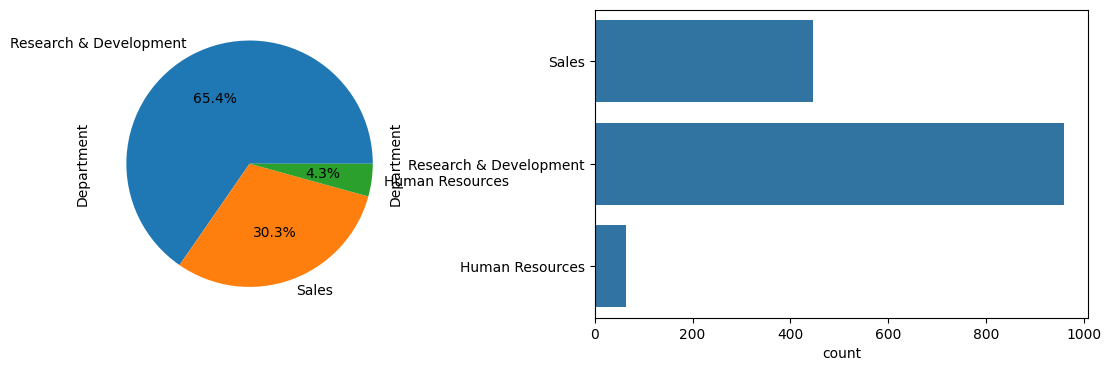

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Department'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Department'])
data['Department'].value_counts()

Education Level

Graduate         572
Post Graduate    398
Undergrad        282
High School      170
Doctorate         48
Name: Education, dtype: int64

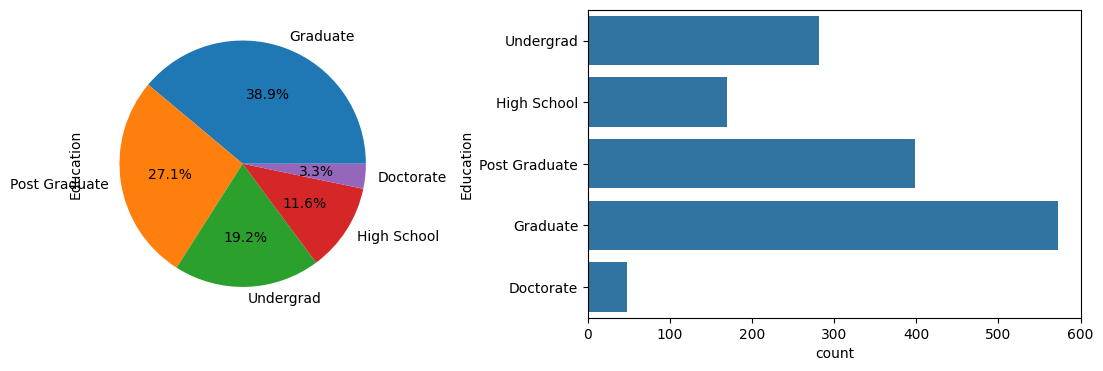

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Education'])
data['Education'].value_counts()

Count by Education Field

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

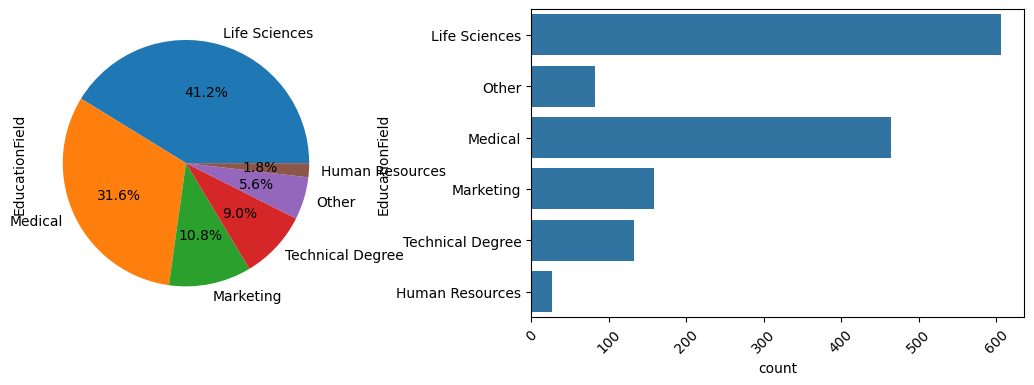

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['EducationField'])
plt.xticks(rotation=45)
data['EducationField'].value_counts()

Counts by JobRole

<Figure size 1400x400 with 0 Axes>

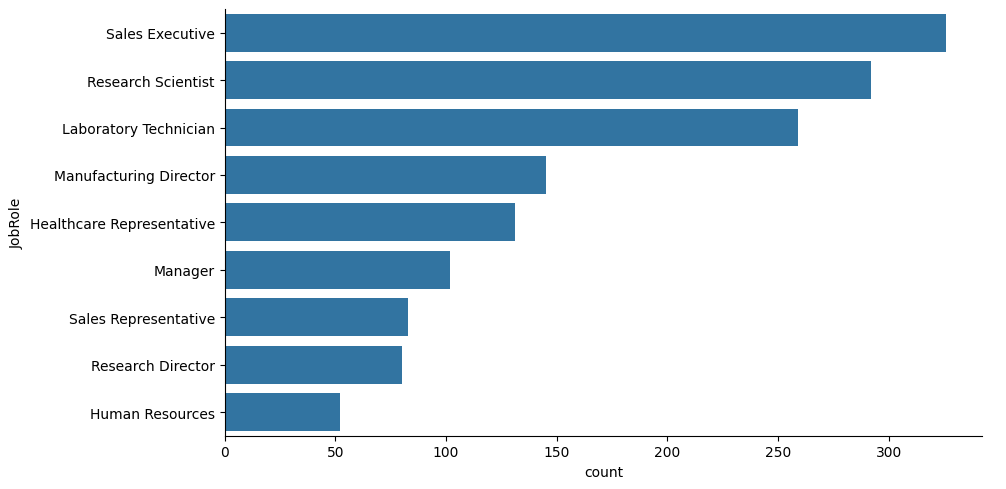

In [ ]:
plt.figure(figsize=(14,4))
sns.catplot(y='JobRole', kind='count', aspect=2, data=data)
# data['JobRole'].value_counts()

Correlation Matrix

Separating Categorical and numerical data

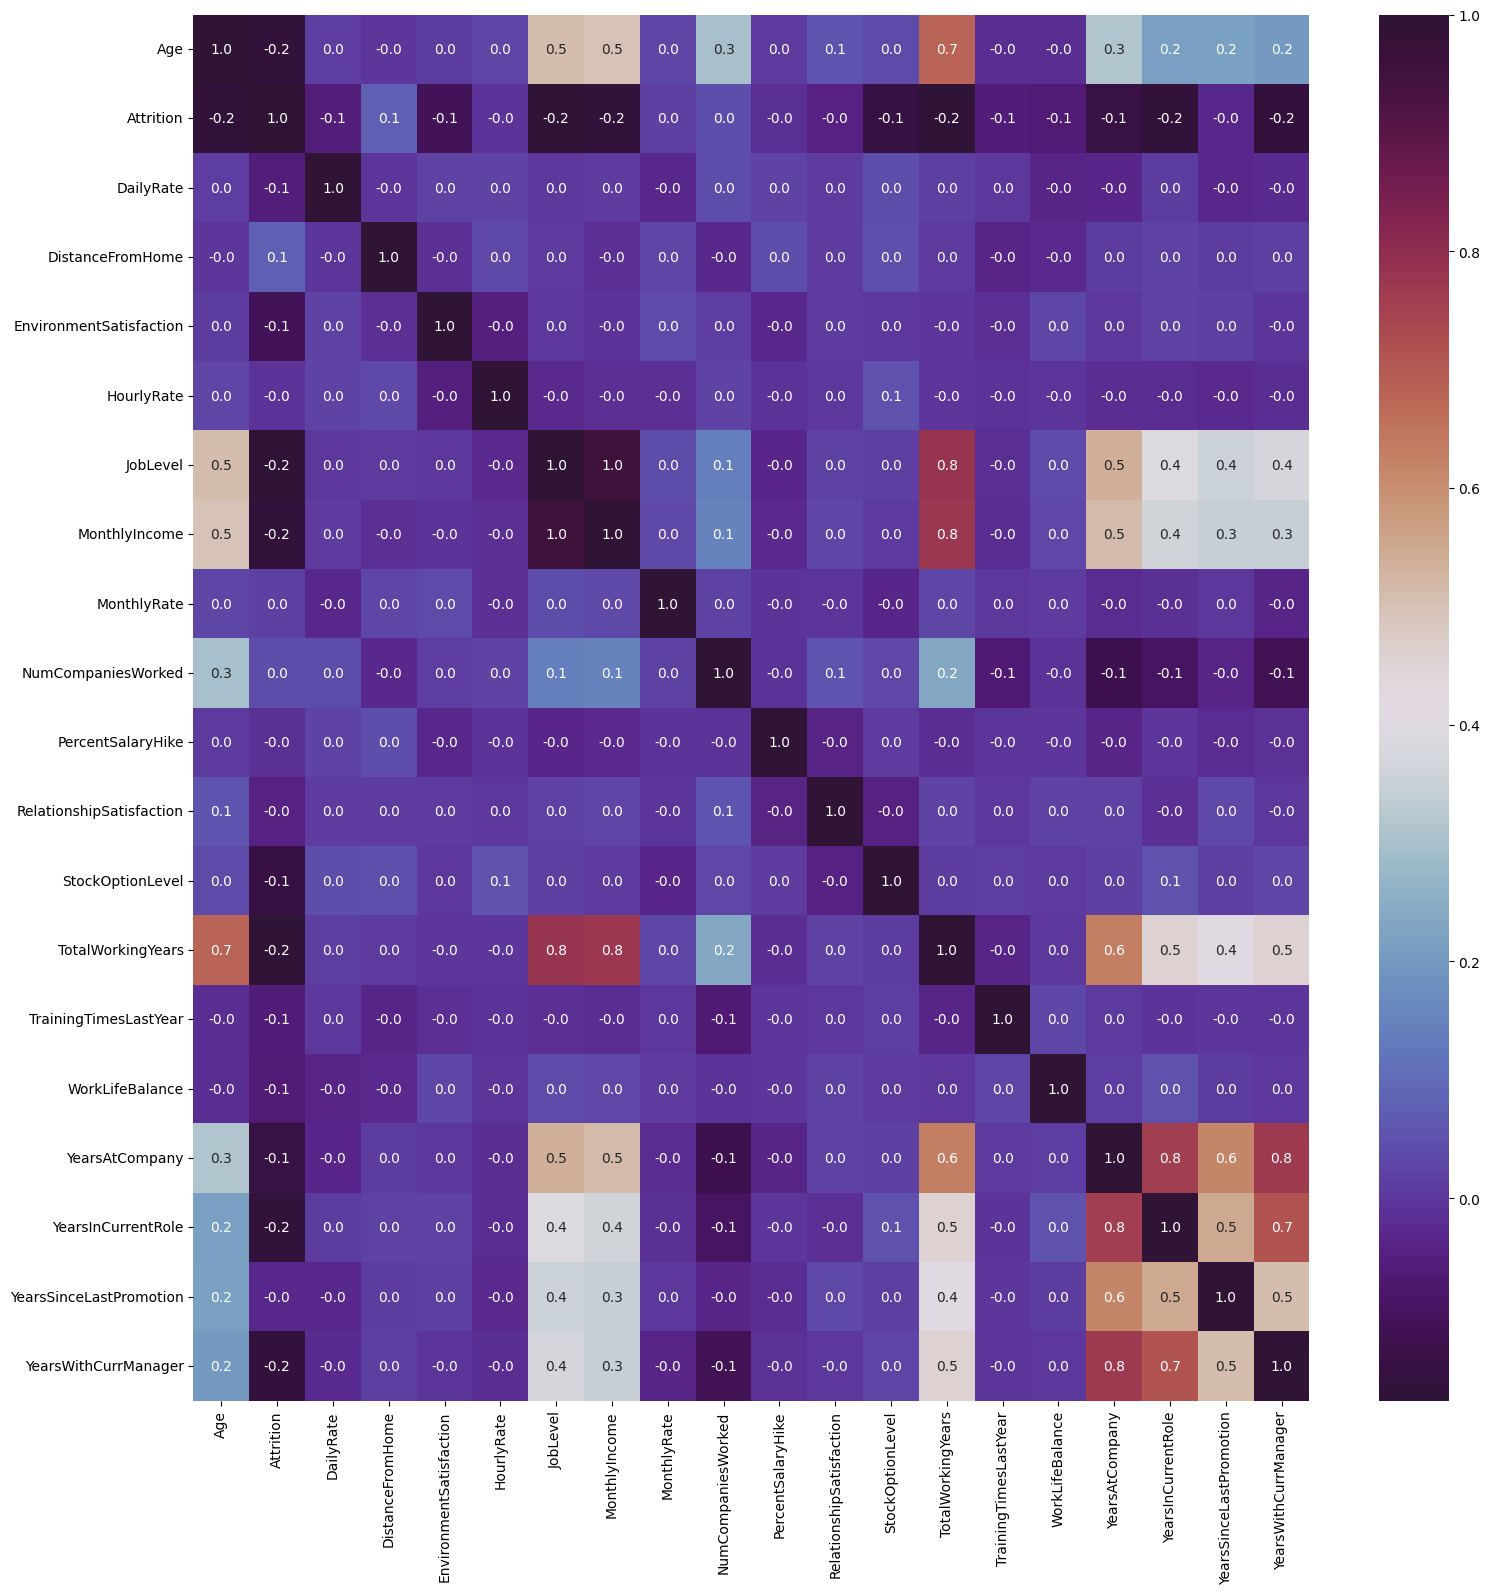

In [ ]:
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
# print(categorical)

df_cat = data[categorical]
# Store the numerical columns in a list numerical
numerical = data.columns.difference(categorical)

# print("\n numerical:" , numerical)
df_num= data[numerical]
# df_cat.head(
plt.figure(figsize=(18,18))
sns.heatmap(df_num.corr(),annot=True ,cmap='twilight_shifted',fmt= '.1f')
plt.show()

Age and monthly income are highly correlated.

 * Age and no.of years of Experience are highly correlated.
 * Income is highly correlated with working hours
 * Salary hike is highly correlated with Performance Bonus

In [ ]:
stayed=data[data.Attrition!=1]
print('Number of employees who did not leave in the dataset:', len(stayed),f'or {round(len(stayed)/data.Attrition.count()*100)}% of the total')

Number of employees who did not leave in the dataset: 1233 or 84% of the total


In [ ]:
stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.771290,65.952149,2.145985,6832.739659,14265.779400,2.64558,15.231144,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.071132,20.380754,1.117933,4818.208001,7102.260749,2.46009,3.639511,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,30.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,48.000000,1.000000,3211.000000,7973.000000,1.00000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,66.000000,2.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,83.000000,3.000000,8834.000000,20364.000000,4.00000,18.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,4.000000,100.000000,5.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
left = data[data.Attrition==1]
left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.464135,65.573840,1.637131,4787.092827,14559.308017,2.940928,15.097046,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.169791,20.099958,0.940594,3640.210367,7208.153264,2.678519,3.770294,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,31.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,1.000000,50.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,66.000000,1.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,84.000000,2.000000,5916.000000,21081.000000,5.000000,17.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,4.000000,100.000000,5.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Mean age of the employees who stayed is higher compared to who left
DailyRate of employees who stayed is higher
'DistanceFromHome': Employees who stayed live closer to home
'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
'StockOptionLevel': Employees who stayed tend to have higher stock option level

In [ ]:
comparison = data[['Attrition','Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel']]
comparison = comparison.groupby('Attrition').mean()
comparison

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel
Attrition,,,,,
0,37.561233,812.504461,8.915653,2.771290,0.845093
1,33.607595,750.362869,10.632911,2.464135,0.527426


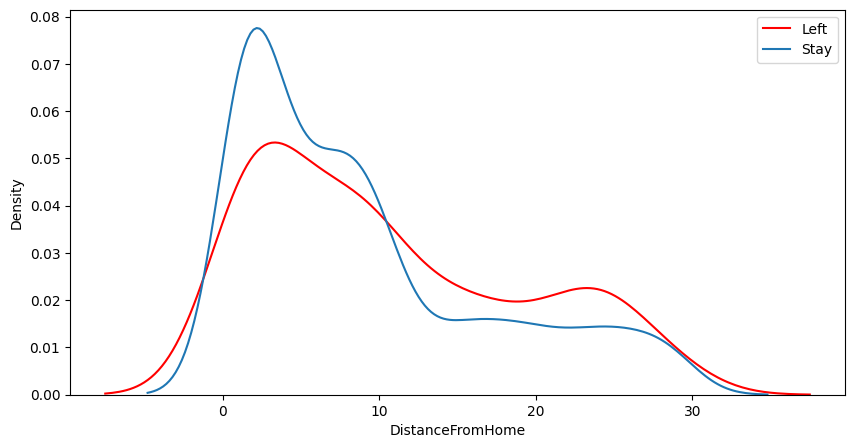

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(left.DistanceFromHome, label='Left',color='r')
sns.kdeplot(stayed.DistanceFromHome, label='Stay')
plt.legend()

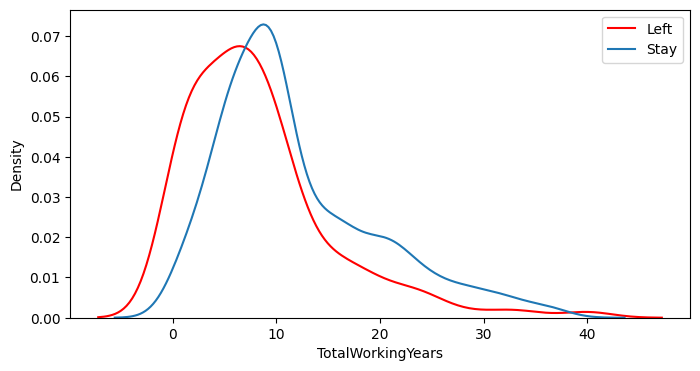

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(left.TotalWorkingYears, label='Left', color='r')
sns.kdeplot(stayed.TotalWorkingYears, label='Stay')
plt.legend()
plt.show()

Minimum and maximum values from the Columns

In [ ]:
l = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        l.append(column)
        print("------------------------------------------------")

Age : Minimum: 18, Maximum: 60
------------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
------------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
------------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
------------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
------------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
------------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
------------------------------------------------


# Numeric Columns
Finding out the outliers

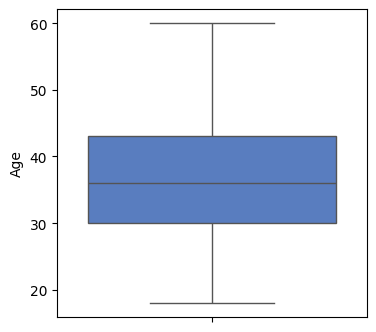

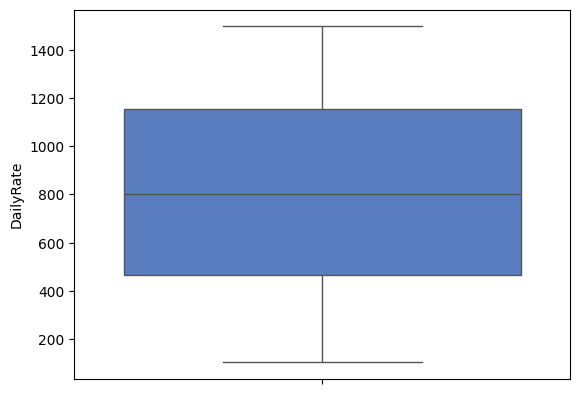

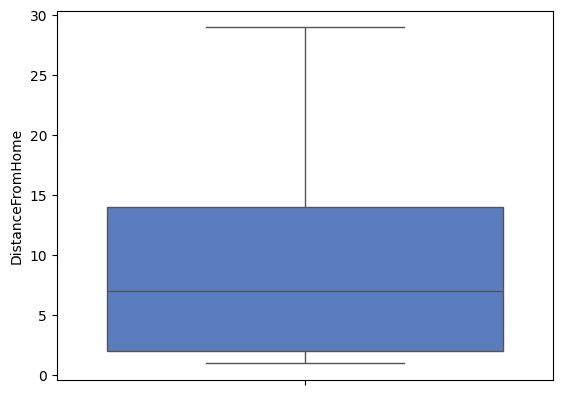

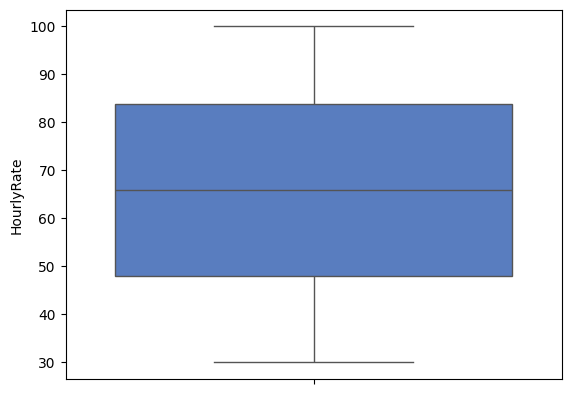

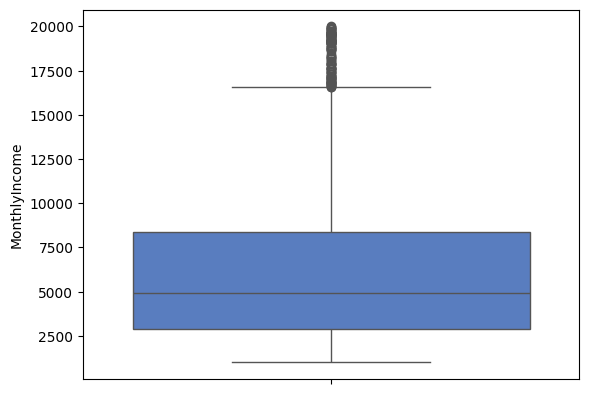

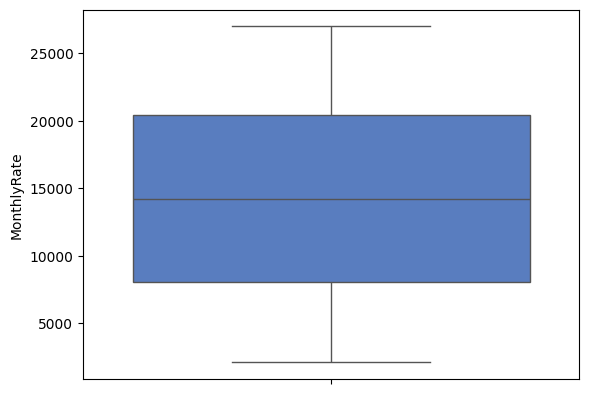

In [ ]:
lst = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate']
fig= plt.figure(figsize=(4,4))
for i in lst:
    sns.boxplot(data[i],palette='muted')
    plt.show()

Attrition by Education Level

In [ ]:
import plotly.express as px
fig=px.histogram(data , x='Education',color='Attrition')
fig.show()
# sns.countplot(data=data , x='Education',hue='Attrition',palette='Set1')

Attrition by Job Involvement

In [ ]:
import plotly.express as px
fig=px.histogram(data , x='JobInvolvement',color='Attrition')
fig.show()

Employees with Job Involvement between low to moderate tend to leave the company, while there is less attrition between high and very high level job involvement.

Attrition By Job Level

In [ ]:
import plotly.express as px
fig=px.histogram(data , x='JobLevel',color='Attrition')
fig.show()

Mostly Employees between junior and associate level tend to leave the company more than compared to others.

Attrition by Salary Hike

In [ ]:
import plotly.express as px
fig=px.histogram(data , x='PercentSalaryHike',color='Attrition')
fig.show()

Employees who receive hikes between 12-14% tend to leave the company more than others with higher Salary hike percentage.

Attrition by Age

In [ ]:
import plotly.express as px
fig=px.histogram(data , x='Age',color='Attrition')
fig.show()

Majority of the employees who leave the company are less than 40yrs of age.

Attrition by Specific Job Role

In [ ]:
def percent_attrition(column, label):
    column_df = data.loc[data[column] == label]
    index  = column_df.index
    att_df = column_df.loc[column_df.Attrition == 1]
    att_index = att_df.index
    return (len(att_index) / len(index)) * 100

AttributeError: module 'numpy' has no attribute 'str'.
`np.str` was a deprecated alias for the builtin `str`. To avoid this error in existing code, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

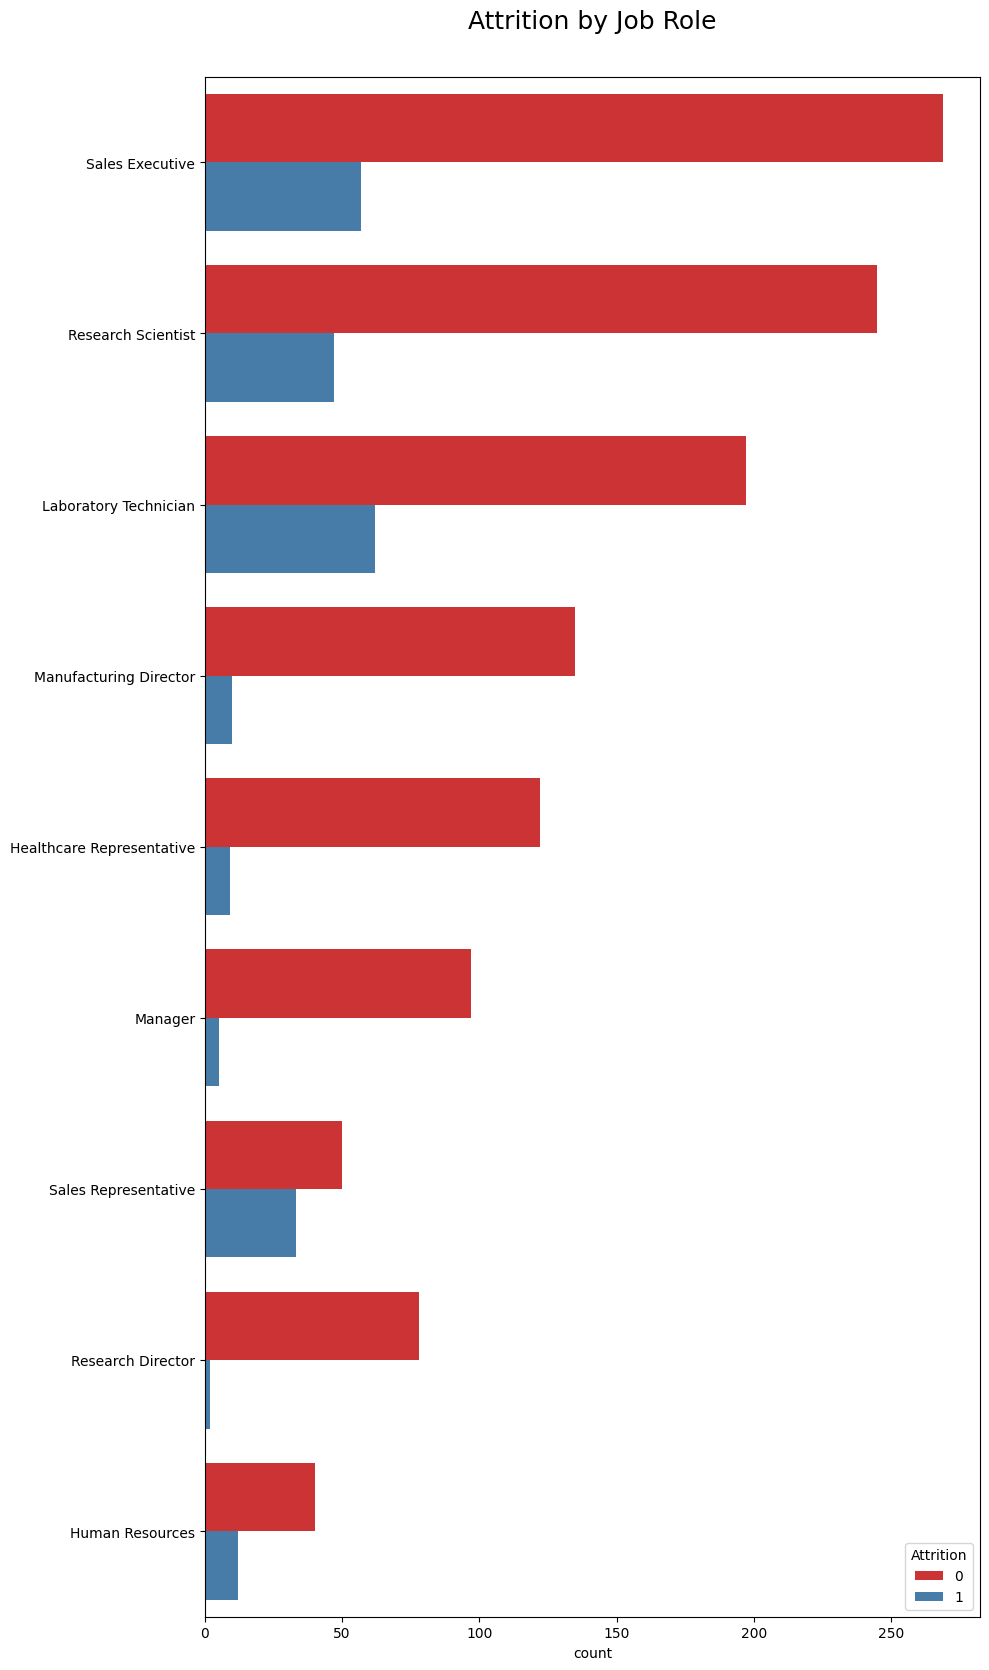

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10, 20))

sns.countplot(data = data,
            y = "JobRole",
            hue = "Attrition",
            palette = "Set1")
ax.set_title("Attrition by Job Role", pad = 35, fontsize = 18)
ax.set_ylabel(None)

def plot_per(column, label, x, y):
    string = np.str(np.round(percent_attrition(column, label),2)) + "% Attrition"
    plt.text(x = x, y = y, s = string, fontweight = "semibold")

plot_per("JobRole", "Sales Executive", 200, -0.19)
plot_per("JobRole", "Research Scientist", 200, .82)
plot_per("JobRole", "Laboratory Technician", 200, 1.85)
plot_per("JobRole", "Manufacturing Director", 180, 2.79)
plot_per("JobRole", "Healthcare Representative", 150, 3.85)
plot_per("JobRole", "Manager", 100, 4.85)
plot_per("JobRole", "Sales Representative", 40, 5.85)
plot_per("JobRole", "Research Director", 30, 6.85)
plot_per("JobRole", "Human Resources", 20, 7.85)

Sales Respresentative has the highest attrition rate

<Axes: xlabel='JobRole', ylabel='MonthlyIncome'>

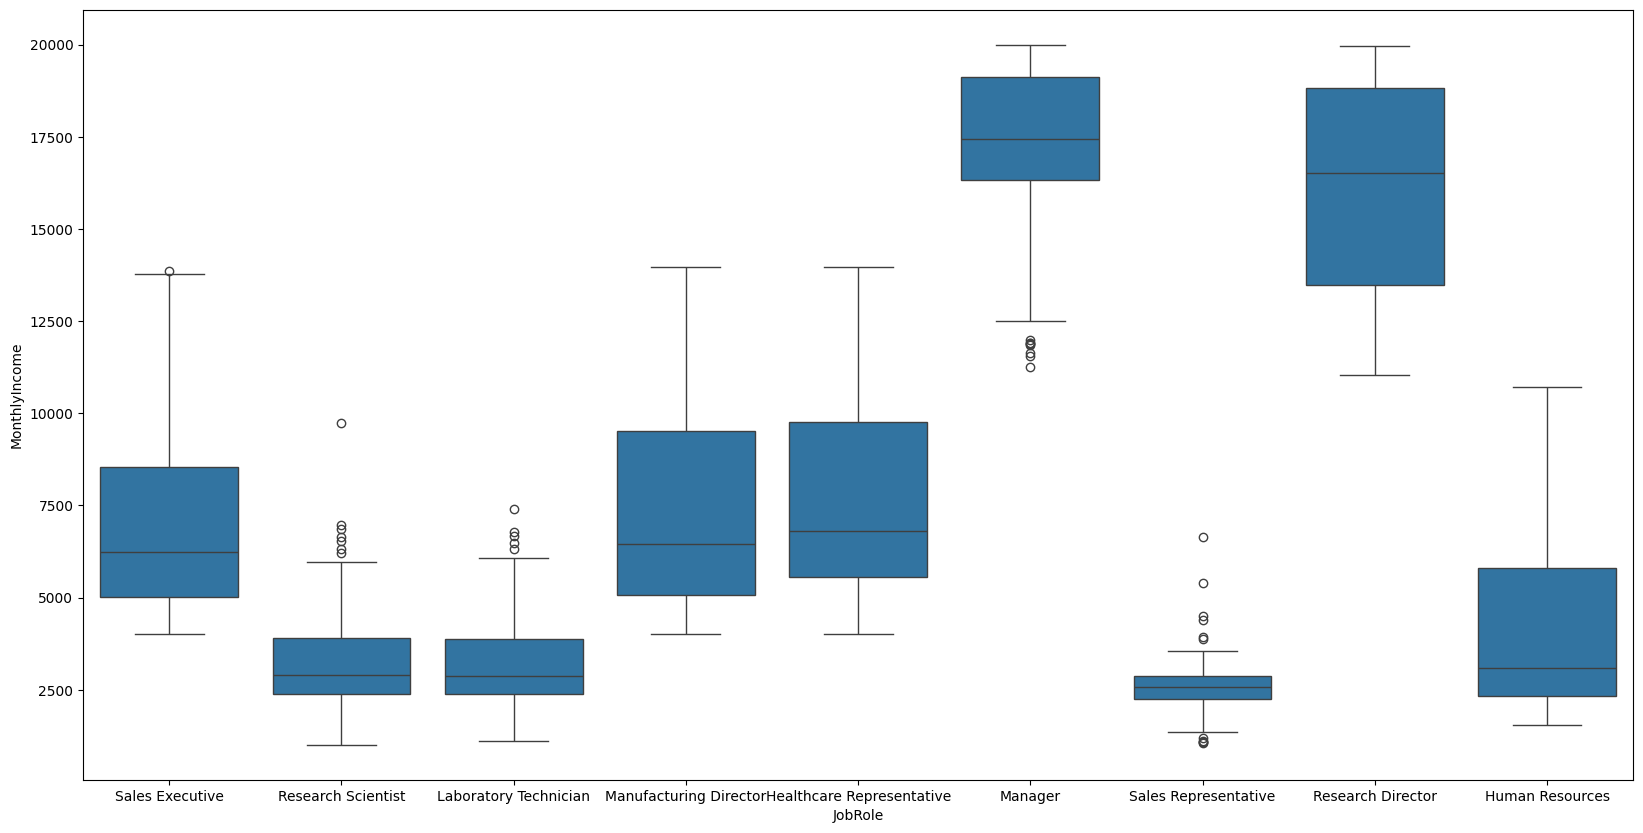

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x='JobRole', y='MonthlyIncome')

As there is less salary to Sales Representative, the attrition for this job role is at higher side.

# Pre Processing

In [ ]:
dummies = pd.get_dummies(df_cat)
dummies.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Doctorate,Education_Graduate,Education_High School,Education_Post Graduate,Education_Undergrad,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_High,PerformanceRating_Very High
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0


In [ ]:
dummy_df =data
dummy_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Undergrad,Life Sciences,2,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,High,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,3,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Very High,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Undergrad,Other,4,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,High,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Post Graduate,Life Sciences,4,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,High,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,High,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,Undergrad,Medical,3,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,High,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,High School,Medical,4,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,No,15,High,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,Graduate,Life Sciences,2,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Very High,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,Graduate,Medical,4,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,High,4,0,17,3,2,9,6,0,8


In [ ]:
df_final = pd.concat([df_num,df_cat],axis=1)

df_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating
0,41,1,1102,1,2,94,2,5993,19479,8,11,1,0,8,0,1,6,4,0,5,Travel_Rarely,Sales,Undergrad,Life Sciences,Female,High,Sales Executive,Very High,Single,Yes,High
1,49,0,279,8,3,61,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,Travel_Frequently,Research & Development,High School,Life Sciences,Male,Medium,Research Scientist,Medium,Married,No,Very High
2,37,1,1373,2,4,92,1,2090,2396,6,15,2,0,7,3,3,0,0,0,0,Travel_Rarely,Research & Development,Undergrad,Other,Male,Medium,Laboratory Technician,High,Single,Yes,High
3,33,0,1392,3,4,56,1,2909,23159,1,11,3,0,8,3,3,8,7,3,0,Travel_Frequently,Research & Development,Post Graduate,Life Sciences,Female,High,Research Scientist,High,Married,Yes,High
4,27,0,591,2,1,40,1,3468,16632,9,12,4,1,6,3,3,2,2,2,2,Travel_Rarely,Research & Development,High School,Medical,Male,High,Laboratory Technician,Medium,Married,No,High


In [ ]:
df_final =df_final.drop(['Attrition'],axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating
0,41,1102,1,2,94,2,5993,19479,8,11,1,0,8,0,1,6,4,0,5,Travel_Rarely,Sales,Undergrad,Life Sciences,Female,High,Sales Executive,Very High,Single,Yes,High
1,49,279,8,3,61,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,Travel_Frequently,Research & Development,High School,Life Sciences,Male,Medium,Research Scientist,Medium,Married,No,Very High
2,37,1373,2,4,92,1,2090,2396,6,15,2,0,7,3,3,0,0,0,0,Travel_Rarely,Research & Development,Undergrad,Other,Male,Medium,Laboratory Technician,High,Single,Yes,High
3,33,1392,3,4,56,1,2909,23159,1,11,3,0,8,3,3,8,7,3,0,Travel_Frequently,Research & Development,Post Graduate,Life Sciences,Female,High,Research Scientist,High,Married,Yes,High
4,27,591,2,1,40,1,3468,16632,9,12,4,1,6,3,3,2,2,2,2,Travel_Rarely,Research & Development,High School,Medical,Male,High,Laboratory Technician,Medium,Married,No,High


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(dummies)
x_normalized

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
x = x_normalized
y = data['Attrition'].values
x

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

x_train

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

# Modeling Phase

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
fit_rf = RandomForestClassifier(random_state=1)

In [ ]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred_rf = fit_rf.predict(x_test)

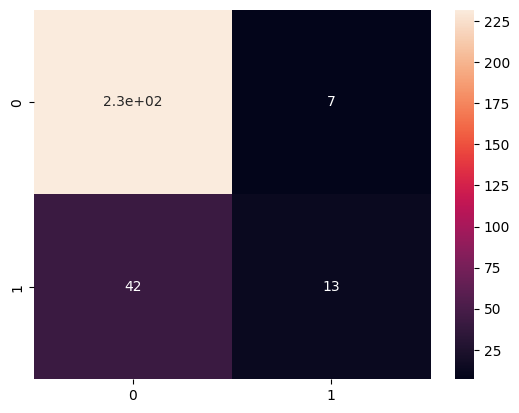

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True )
plt.show()

In [ ]:
y_prob_rf = fit_rf.predict_proba(x_test)
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf[:,1])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       239
           1       0.65      0.24      0.35        55

    accuracy                           0.83       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.81      0.83      0.80       294



In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(fit_rf, x_test, y_test, normalize="true", cmap="Blues")

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
importances = fit_rf.feature_importances_
importances

array([0.01166993, 0.03089993, 0.0263612 , 0.00538512, 0.01721482,
       0.0159805 , 0.00785021, 0.03801772, 0.02593373, 0.03436235,
       0.02658968, 0.0071977 , 0.02954878, 0.01811767, 0.03068732,
       0.01049716, 0.02175128, 0.03275422, 0.0306335 , 0.03430357,
       0.02718117, 0.02642895, 0.01464653, 0.01377806, 0.00637191,
       0.03194676, 0.00905883, 0.01545417, 0.00872078, 0.02112853,
       0.01633286, 0.02109953, 0.03464168, 0.03408621, 0.02734013,
       0.03248555, 0.02201583, 0.02833805, 0.03801869, 0.03532523,
       0.04027406, 0.01872983, 0.02084029])

Text(0, 0.5, 'Features')

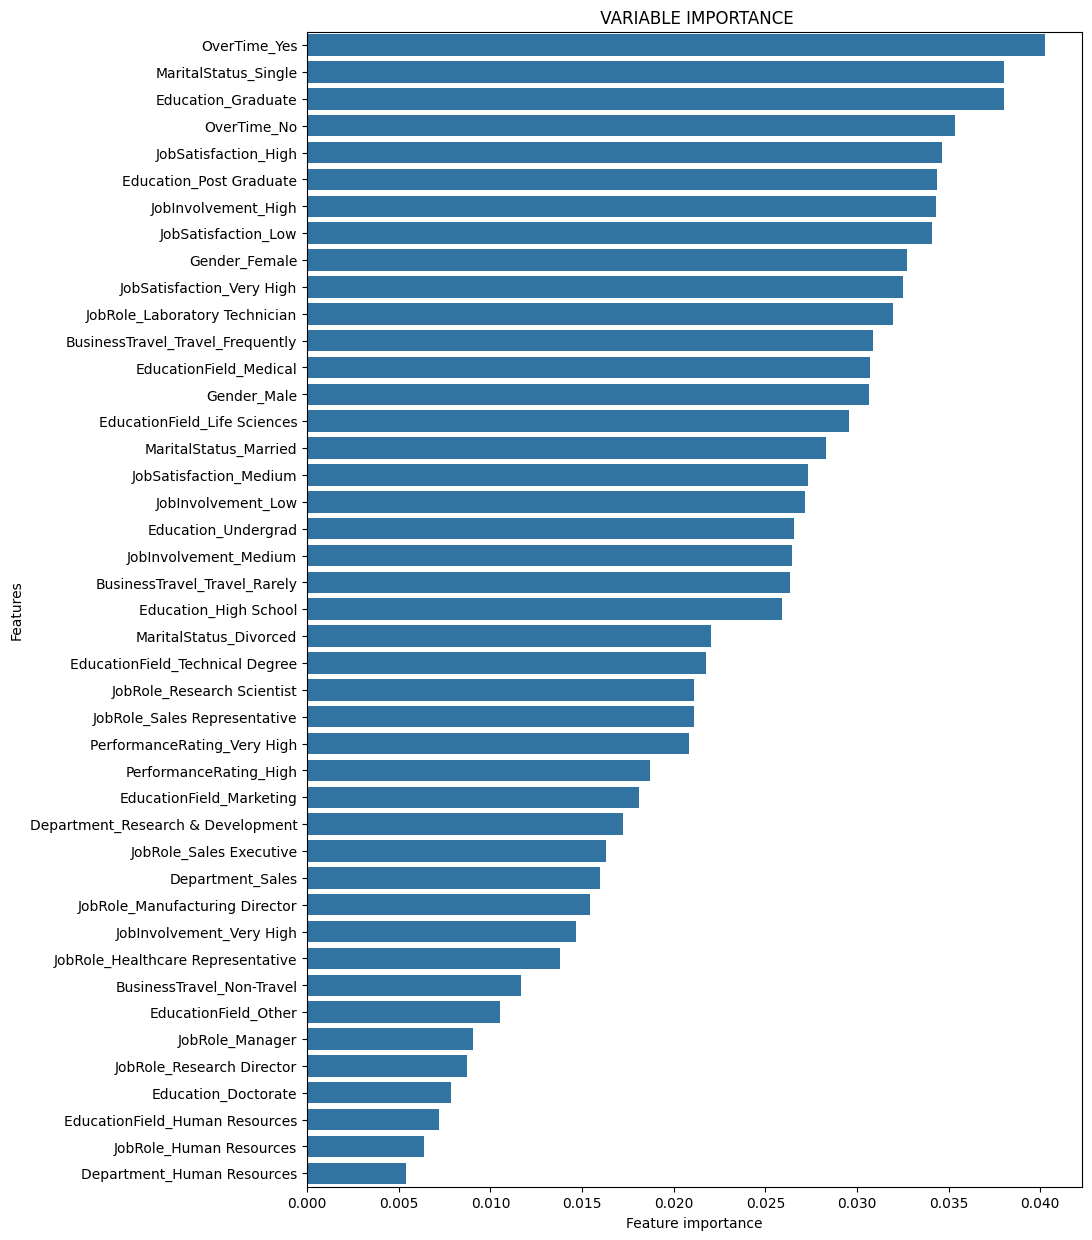

In [ ]:
feature_imp = np.array(importances)
feature_names= np.array(dummies.columns)
data={'feature_names':feature_names,'feature_importance':feature_imp}
table = pd.DataFrame(data)
table.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,15))
sns.barplot(x=table['feature_importance'], y=table['feature_names'])
plt.title(' VARIABLE IMPORTANCE')
plt.xlabel('Feature importance')
plt.ylabel('Features')

Hyper Parameter Optimization


Grid Search CV

In [ ]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 2)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None}
Time taken in grid search:  77.64


In [ ]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 2)

RandomForestClassifier(max_depth=2, max_features='log2', random_state=1)

In [ ]:
accuracy_rf = accuracy_score(y_test ,y_pred_rf)
accuracy_rf

0.8333333333333334

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

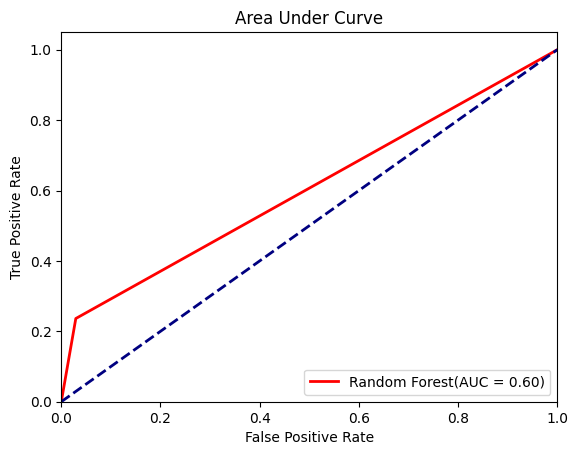

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[241,   4],
       [ 37,  12]])

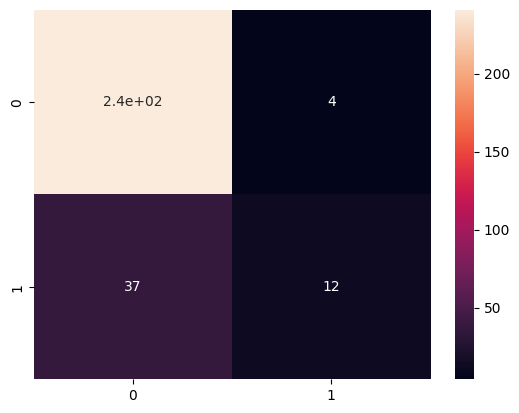

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [ ]:
accuracy_logreg = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_logreg)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8605442176870748
Precision: 0.75
Recall: 0.24489795918367346


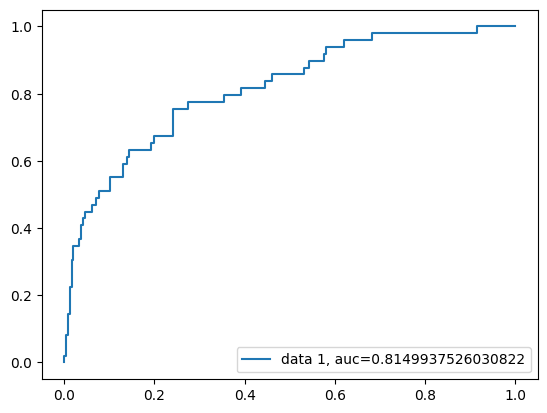

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Decision **Tree**

In [ ]:
x = x_normalized
y = data['Attrition'].values

x
#y

KeyError: 'Attrition'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

x_train

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='gini')
model_dt.fit(x_train,y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
# y_pred_dt

Training score:  0.8579931972789115
Testing score:  0.8435374149659864


In [ ]:
model_dt1 = DecisionTreeClassifier(max_depth=8, random_state=1,criterion ='entropy')
model_dt1.fit(x_train, y_train)
model_dt1_score_train = model_dt1.score(x_train, y_train)
print("Training score: ",model_dt1_score_train)
model_dt1_score_test = model_dt1.score(x_test, y_test)
print("Testing score: ",model_dt1_score_test)

Training score:  0.9022108843537415
Testing score:  0.8333333333333334


Performance Metrics

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [ ]:
predictions = model_dt.predict(x_test)
# predictions

In [ ]:
y_pred_gini = model_dt.predict(x_test)

y_pred_entropy= model_dt1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_gini)

0.8435374149659864

In [ ]:
acc_dt =accuracy_score(y_test,y_pred_entropy)
acc_dt

0.8333333333333334

Testing set Performace

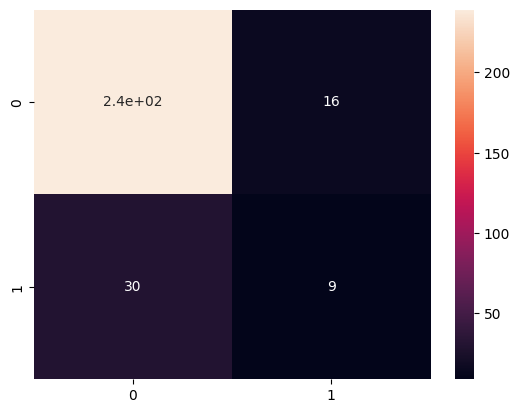

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       255
           1       0.36      0.23      0.28        39

    accuracy                           0.84       294
   macro avg       0.62      0.58      0.60       294
weighted avg       0.82      0.84      0.83       294



Area under the curve

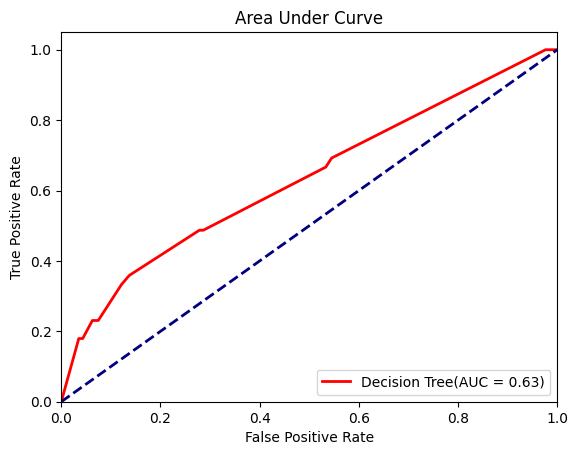

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='red',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

**SVM**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8231292517006803


Using Linear Kernel

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8027210884353742


Using Polynomial Kernel

In [ ]:
svc= SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
accuracy_svm=metrics.accuracy_score(y_test,y_pred)
accuracy_svm

Accuracy Score:


0.8027210884353742

Using Radial Kernel

In [ ]:
svc= SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score:
0.8231292517006803


Optimizing Hyperparameter C

In [ ]:
from sklearn.model_selection import cross_val_score

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817]


Text(0, 0.5, 'Cross-Validated Accuracy')

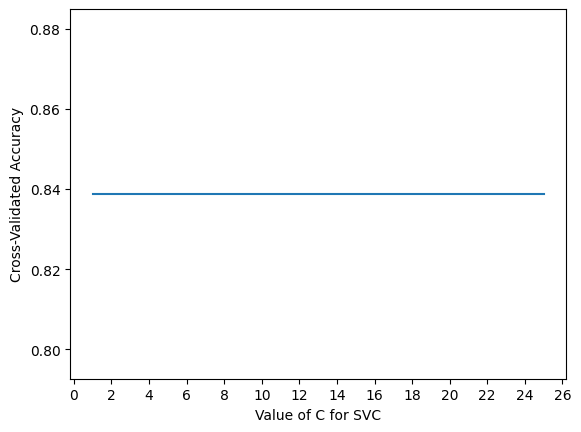

In [ ]:
C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

Optimizing Gamma Parameter

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8387755102040817, 0.8387755102040817, 0.8387755102040817, 0.8482993197278912, 0.8346938775510203, 0.8346938775510203, 0.8346938775510203]


Text(0, 0.5, 'Cross-Validated Accuracy')

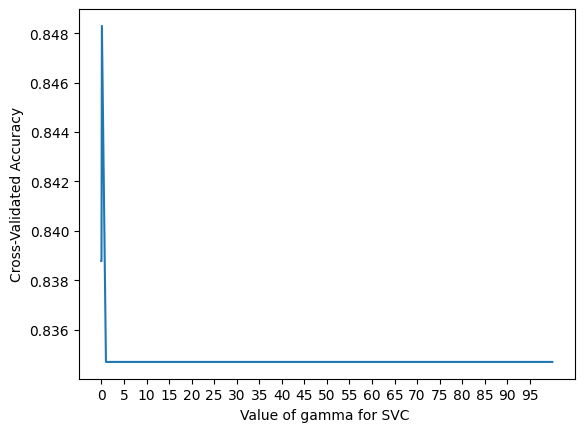

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
svm_model= SVC()

In [ ]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

model_svm= GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.8477908155874256


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(x,y)
accuracy=[]
mean_acc = []
classifiers=['Logistic Regression','Decision Tree','Linear SVM', 'Random Forest Classifier']
models=[logreg,model_dt1,svc,fit_rf]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = skf,scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)

Combined Model Accuracies

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','SVM'],
    'Score' : [accuracy_logreg,acc_dt,accuracy_rf,accuracy_svm]
    # acc_vtc, 'Voting Classifier'

})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.860544
1,Decision Tree Classifier,0.833333
2,Random Forest Classifier,0.833333
3,SVM,0.802721
